In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

mouse_drug_data.head()
clinical_trial_data.head()

# Combine the data into a single dataset using Mouse ID
mouse_data_merge = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume = mouse_data_merge.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [3]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

sem_tumor_volume = mouse_data_merge.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)
sem_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# need to reset the index
# pivot the tumor mean volume and standard error of measurment

mean_tumor_volume = mean_tumor_volume.reset_index()
mean_tumor_volume = mean_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
mean_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
sem_tumor_volume = sem_tumor_volume.reset_index()
sem_tumor_volume = sem_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
sem_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


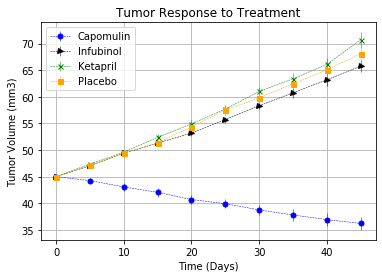

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_volume.index, mean_tumor_volume["Capomulin"], yerr=sem_tumor_volume["Capomulin"], color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(mean_tumor_volume.index, mean_tumor_volume["Infubinol"], yerr=sem_tumor_volume["Infubinol"], color="black", marker=">", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(mean_tumor_volume.index, mean_tumor_volume["Ketapril"], yerr=sem_tumor_volume["Ketapril"], color="green", marker="x", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(mean_tumor_volume.index, mean_tumor_volume["Placebo"], yerr=sem_tumor_volume["Placebo"], color="orange", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Label and format table
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="10", fancybox=True)

# Save the Figure
plt.savefig("figure1.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# copy from the above to create the metastatic response
# Convert to DataFrame
# Preview DataFrame

met_site_mean = mouse_data_merge.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
met_site_mean = pd.DataFrame(met_site_mean)
met_site_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
sem_met_site = mouse_data_merge.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
sem_met_site = pd.DataFrame(sem_met_site)
sem_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

met_site_mean = met_site_mean.reset_index()
met_site_mean = met_site_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
met_site_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
sem_met_site = sem_met_site.reset_index()
sem_met_site = sem_met_site.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
sem_met_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


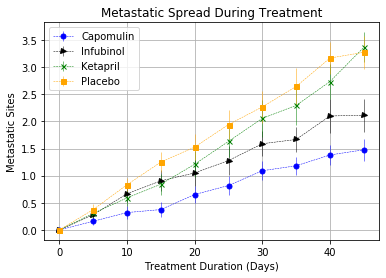

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_site_mean.index, met_site_mean["Capomulin"], yerr=sem_met_site["Capomulin"], color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(met_site_mean.index, met_site_mean["Infubinol"], yerr=sem_met_site["Infubinol"], color="black", marker=">", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(met_site_mean.index, met_site_mean["Ketapril"], yerr=sem_met_site["Ketapril"], color="green", marker="x", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(met_site_mean.index, met_site_mean["Placebo"], yerr=sem_met_site["Placebo"], color="orange", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Label and format table
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="10", fancybox=True)

# Save the Figure
plt.savefig("figure2.png")

# Show the Figure
plt.show()


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mouse_survive_count = mouse_data_merge.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mouse_survive_count = pd.DataFrame(mouse_survive_count)
mouse_survive_count = mouse_survive_count.rename(columns={"Mouse ID": "Mouse Count"})
mouse_survive_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
mouse_survive_count = mouse_survive_count.reset_index()
mouse_survive_count = mouse_survive_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
mouse_survive_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


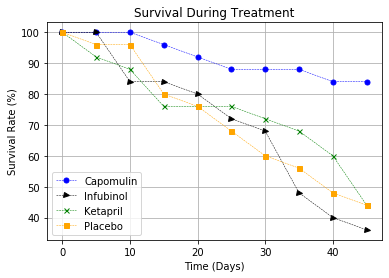

In [14]:
# Generate the Plot (Accounting for percentages)
number_of_mice = 25

plt.plot(mouse_survive_count["Capomulin"] / number_of_mice * 100, color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(mouse_survive_count["Infubinol"] / number_of_mice * 100, color="black", marker=">", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.plot(mouse_survive_count["Ketapril"] / number_of_mice * 100, color="green", marker="x", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.plot(mouse_survive_count["Placebo"] / number_of_mice * 100, color="orange", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Label and format table
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="10", fancybox=True)

# Save the Figure
plt.savefig("figure3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
# Display the data to confirm
tumor_percent_change = (mean_tumor_volume.iloc[-1] - mean_tumor_volume.iloc[0]) / mean_tumor_volume.iloc[0] * 100
sem_tumor_percent_change = (sem_tumor_volume.iloc[-1] - sem_tumor_volume.iloc[0]) / sem_tumor_volume.iloc[0] * 100
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [16]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (tumor_percent_change["Capomulin"],
                  tumor_percent_change["Infubinol"],
                  tumor_percent_change["Ketapril"],
                  tumor_percent_change["Placebo"])
                  
percent_change



(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

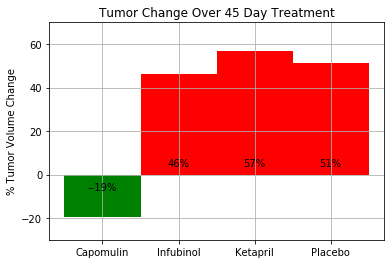

In [17]:
fig, ax = plt.subplots()
ind = np.arange(len(percent_change))
width = 1

# Splice the data between passing and failing drugs
rectsPass = ax.bar(ind[0], percent_change[0], width, color = "g")
rectsFail = ax.bar(ind[1:], percent_change[1:], width, color = "r")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
#ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def labelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               "%d%%" % int(height),
               ha="center", va="bottom", color="black")

def labelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               "-%d%%" % int(height),
               ha="center", va="bottom", color="black")
        
        
# Call functions to implement the function calls
labelFail(rectsFail)
labelPass(rectsPass)

# Save the Figure
plt.savefig("figure4.png")

# Show the Figure
fig.show()